In [45]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [77]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
from scipy.stats import linregress
import datetime as dt  # optional
import arch.data.sp500

In [78]:
EURUSD = yf.download('EURUSD=X', start='2017-01-01', end='2022-12-31', interval = '1d')
EURUSD

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,1.053075,1.054074,1.046572,1.052698,1.052698,0
2017-01-03,1.045916,1.049208,1.034768,1.046003,1.046003,0
2017-01-04,1.041840,1.047889,1.039134,1.041992,1.041992,0
2017-01-05,1.049869,1.060895,1.048658,1.050089,1.050089,0
2017-01-06,1.060558,1.060895,1.053963,1.060592,1.060592,0
...,...,...,...,...,...,...
2022-12-26,1.066780,1.063717,1.060895,1.066780,1.066780,0
2022-12-27,1.064022,1.066900,1.061244,1.064022,1.064022,0
2022-12-28,1.063717,1.067430,1.061391,1.063717,1.063717,0


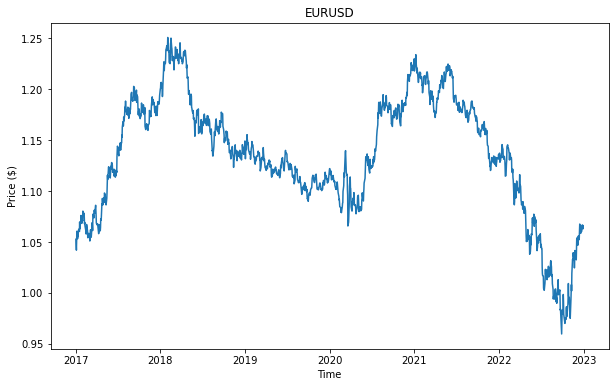

In [79]:
fig = plt.figure(figsize=(10, 6))
plt.plot(EURUSD['Adj Close'])
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('EURUSD');

In [80]:
#S1 = np.zeros((12, 1)) # inflation rate for Eurozone in 2022 in %
#S1=['5.11','5.87','7.44','7.44','8.05','8.64','8.87','9.14','9.93','10.62','10.05','9.05']

In [81]:
EURUSD['Log returns'] = np.log(EURUSD['Close']/EURUSD['Close'].shift())

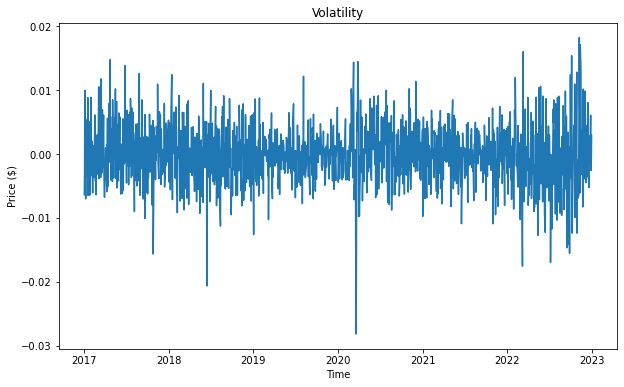

In [82]:
fig = plt.figure(figsize=(10, 6))
plt.plot(EURUSD['Log returns'])
plt.xlabel('Time')
plt.ylabel('Price ($)')
plt.title('Volatility');

In [83]:
EURUSD['Adj Close'].describe()

count    1562.000000
mean        1.134947
std         0.058883
min         0.959619
25%         1.101686
50%         1.135570
75%         1.179523
max         1.251001
Name: Adj Close, dtype: float64

Iteration:      1,   Func. Count:      5,   Neg. LLF: 7272.255562293067
Iteration:      2,   Func. Count:     13,   Neg. LLF: 3030.020509084275
Iteration:      3,   Func. Count:     21,   Neg. LLF: 984.6626481100587
Iteration:      4,   Func. Count:     26,   Neg. LLF: 987.1536346136679
Iteration:      5,   Func. Count:     31,   Neg. LLF: 1003.0783970082393
Iteration:      6,   Func. Count:     36,   Neg. LLF: 976.7794555863152
Iteration:      7,   Func. Count:     40,   Neg. LLF: 976.7778736697452
Iteration:      8,   Func. Count:     44,   Neg. LLF: 976.7772874800405
Iteration:      9,   Func. Count:     47,   Neg. LLF: 976.7772874798975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 976.7772874800405
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:               

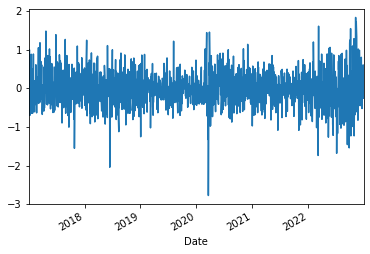

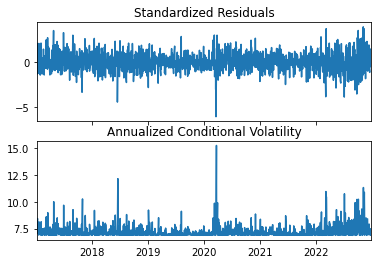

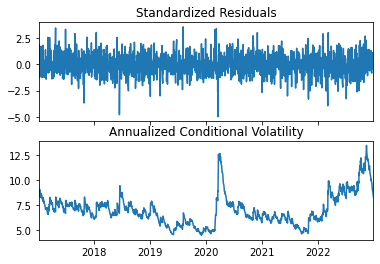

In [84]:
import datetime as dt  # optional
import arch.data.sp500

st = dt.datetime(1988, 1, 1) # setting the date. Optional line.
en = dt.datetime(2018, 1, 1) # setting the date. Optional line.

market = EURUSD["Adj Close"]

returns = 100 * market.pct_change().dropna() # generating return series
ax = returns.plot() # ploting the data

xlim = ax.set_xlim(returns.index.min(), returns.index.max())

# Estimating a GARCH and ARCH models
from arch import arch_model

model1 = arch_model(returns, p=1,o=0,q=0)
out1=model1.fit()
print(out1.summary())

model2 = arch_model(returns, p=1,o=0,q=1)
out2=model2.fit()
print(out2.summary())

fig1 = out1.plot(annualize="D") #generating volatility graphs

fig2 = out2.plot(annualize="D") #generating volatility graphs



Iteration:      1,   Func. Count:      7,   Neg. LLF: 6616.396556183375
Iteration:      2,   Func. Count:     18,   Neg. LLF: 8954.463929018264
Iteration:      3,   Func. Count:     29,   Neg. LLF: 3269.0171847253096
Iteration:      4,   Func. Count:     37,   Neg. LLF: 992.6406590195812
Iteration:      5,   Func. Count:     44,   Neg. LLF: 1213.1217218282964
Iteration:      6,   Func. Count:     51,   Neg. LLF: 920.1951087994448
Iteration:      7,   Func. Count:     57,   Neg. LLF: 1075.0205504227051
Iteration:      8,   Func. Count:     64,   Neg. LLF: 935.8694558016927
Iteration:      9,   Func. Count:     72,   Neg. LLF: 945.4870966436822
Iteration:     10,   Func. Count:     79,   Neg. LLF: 990.2383454876708
Iteration:     11,   Func. Count:     86,   Neg. LLF: 917.1030855712145
Iteration:     12,   Func. Count:     93,   Neg. LLF: 916.0793257827129
Iteration:     13,   Func. Count:     99,   Neg. LLF: 916.0537349198414
Iteration:     14,   Func. Count:    105,   Neg. LLF: 916.053

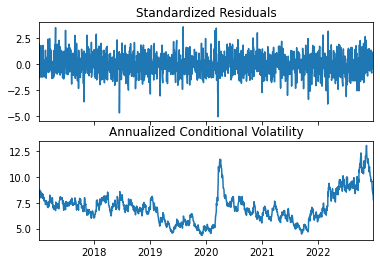

In [85]:
# Estimating TGARCH

model3= arch_model(returns, p=1, o=1, q=1, power=1.0)
out3= model3.fit()
print(out3.summary())
fig3 = out3.plot(annualize="D") #generating volatility graphs

In [86]:
# mock example volatility prediction
import arch
import numpy as np

# Load your data into a pandas dataframe
data = yf.download('EURUSD=X', start='2017-01-01', end='2022-12-31', interval = '1d')

# Fit an ARCH model to the data
arch_model = arch.arch_model(data["Adj Close"], mean="Constant", vol="ARCH", p=1)
res = arch_model.fit()

# Get the estimated parameters
params = res.params
omega = params["omega"]
alpha = params["alpha[1]"]

# Determine the number of forecast periods
forecast_periods = 12

# Create an empty array to store the forecasted conditional variances
cond_variances = np.zeros(forecast_periods)

# Use the estimated parameters to calculate the forecasted conditional variances
for i in range(forecast_periods):
    if i == 0:
        # The first forecasted conditional variance is based on the last residual variance
        last_residual_variance = res.resid.var()
        cond_variances[i] = omega + alpha * last_residual_variance
    else:
        # For subsequent periods, use the forecasted conditional variance from the previous period
        cond_variances[i] = omega + alpha * cond_variances[i-1]

# Calculate the forecasted standard deviations
stdevs = np.sqrt(cond_variances)

# Calculate the forecast by adding the forecasted standard deviations to the mean of the model
forecast = params["mu"] + stdevs






[*********************100%***********************]  1 of 1 completed
Iteration:      1,   Func. Count:      5,   Neg. LLF: 22519193.292194173
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9077241.848318228
Iteration:      3,   Func. Count:     25,   Neg. LLF: 861746.8228276657
Iteration:      4,   Func. Count:     35,   Neg. LLF: -2886.3646180639744
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2886.3646187174318
            Iterations: 8
            Function evaluations: 35
            Gradient evaluations: 4


C:\Users\tudor\anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003465. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


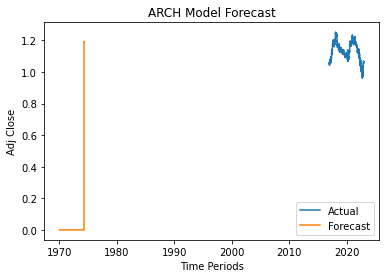

In [93]:
plt.plot(EURUSD["Adj Close"])
plt.plot(np.append(np.zeros(len(EURUSD["Adj Close"])), forecast))
plt.title("ARCH Model Forecast")
plt.xlabel("Time Periods")
plt.ylabel("Adj Close")
plt.legend(["Actual","Forecast"])
plt.show()

In [111]:
am = arch_model(returns, vol="Arch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     30,   Neg. LLF: 976.7772873850287
Optimization terminated successfully    (Exit mode 0)
            Current function value: 976.7772873850481
            Iterations: 5
            Function evaluations: 30
            Gradient evaluations: 5


In [109]:
forecasts = res.forecast(reindex=False)